Enrollment No : 180280116024 <br>
Sub : DAV

<h1><center>Practical 4 </center></h1>

<B>Aim :</B> Implement K-Means Clustering For Following data.<br>
1. What is inertia? what is the value of inertia according to this dataset?<br>
2. Interpret the results.<br>
3. Identify how many data points fall in each cluster.

In [1]:
#importing libraries

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
#load the data

Sales_data = pd.read_csv('Sales.csv')
Sales_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES
0,10107,30,95.70,2,2871.00
1,10121,34,81.35,5,2765.90
2,10134,41,94.74,2,3884.34
3,10145,45,83.26,6,3746.70
4,10159,49,100.00,14,5205.27


In [3]:
#print size of the data
Sales_data.shape

(29, 5)

In [4]:
#find if null value is there or not
Sales_data.isnull().any()

ORDERNUMBER        False
QUANTITYORDERED    False
PRICEEACH          False
ORDERLINENUMBER    False
SALES              False
dtype: bool

## kmeans using 3 cluster

In [5]:
#kmeans using sklearn with cluster 3

kmeans3 = KMeans(n_clusters=3)

In [6]:
kmeans3.fit(Sales_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
# The lowest SSE value
kmeans3.inertia_

11194662.175281167

In [8]:
# Final locations of the centroid
kmeans3.cluster_centers_

array([[1.02657273e+04, 2.69090909e+01, 8.59609091e+01, 6.54545455e+00,
        2.38619545e+03],
       [1.02490000e+04, 4.35000000e+01, 1.00000000e+02, 5.75000000e+00,
        7.44804500e+03],
       [1.02208571e+04, 4.05000000e+01, 9.73021429e+01, 4.71428571e+00,
        4.35781857e+03]])

In [9]:
# The number of iterations required to converge
kmeans3.n_iter_

4

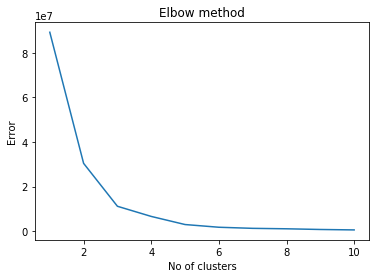

In [20]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(Sales_data)
    kmeans.fit(Sales_data)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

## kmeans using 4 cluster

In [11]:
#kmeans using sklearn with cluster 4
kmeans4 = KMeans(n_clusters=4)

kmeans4.fit(Sales_data)

# The lowest SSE value
print("inertia : ",kmeans4.inertia_)

# Final locations of the centroid
print("cluster_centers : ",kmeans4.cluster_centers_)

inertia :  6645437.076980555
cluster_centers :  [[1.02490000e+04 4.35000000e+01 1.00000000e+02 5.75000000e+00
  7.44804500e+03]
 [1.02558333e+04 3.94166667e+01 9.48825000e+01 2.66666667e+00
  3.88121417e+03]
 [1.02537778e+04 2.51111111e+01 8.54677778e+01 7.33333333e+00
  2.20582111e+03]
 [1.01652500e+04 4.10000000e+01 1.00000000e+02 1.00000000e+01
  5.20766250e+03]]


## kmeans using 5 cluster

In [12]:
#kmeans using sklearn with cluster 4
kmeans5 = KMeans(n_clusters=5)

model = kmeans5.fit(Sales_data)

# The lowest SSE value
print("inertia : ",kmeans5.inertia_)

# Final locations of the centroid
print("cluster_centers : ",kmeans5.cluster_centers_)

inertia :  3010384.1570361117
cluster_centers :  [[1.01652500e+04 4.10000000e+01 1.00000000e+02 1.00000000e+01
  5.20766250e+03]
 [1.02430000e+04 2.83333333e+01 9.31233333e+01 5.22222222e+00
  2.67378222e+03]
 [1.02490000e+04 4.35000000e+01 1.00000000e+02 5.75000000e+00
  7.44804500e+03]
 [1.02431000e+04 4.03000000e+01 9.62230000e+01 2.60000000e+00
  4.01788100e+03]
 [1.03680000e+04 2.05000000e+01 5.37300000e+01 1.25000000e+01
  1.09205500e+03]]


## What is inertia? what is the value of inertia according to this dataset?

- Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.
- A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.

In [13]:
kmeans5.inertia_

3010384.1570361117

## Interpret the results.

- With increase in k value interia value decreases.

## Identify how many data points fall in each cluster.

In [14]:
kmeans5.labels_

array([1, 1, 3, 3, 0, 3, 1, 0, 1, 0, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 2, 4,
       4, 1, 1, 2, 0, 2, 2])

In [15]:
#data in cluster0
(kmeans5.labels_ == 0).sum()

4

In [16]:
#data in cluster1
(kmeans5.labels_ == 1).sum()

9

In [17]:
#data in cluster2
(kmeans5.labels_ == 2).sum()

4

In [18]:
#data in cluster3
(kmeans5.labels_ == 3).sum()

10

In [19]:
#data in cluster4
(kmeans5.labels_ == 4).sum()

2